[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
Returns       -0.442775
Volatility     0.459155
CNP Weight     0.009395
F Weight       0.070233
WMT Weight     0.042508
GE Weight      0.046614
TSLA Weight    0.039509
Name: 21447, dtype: float64


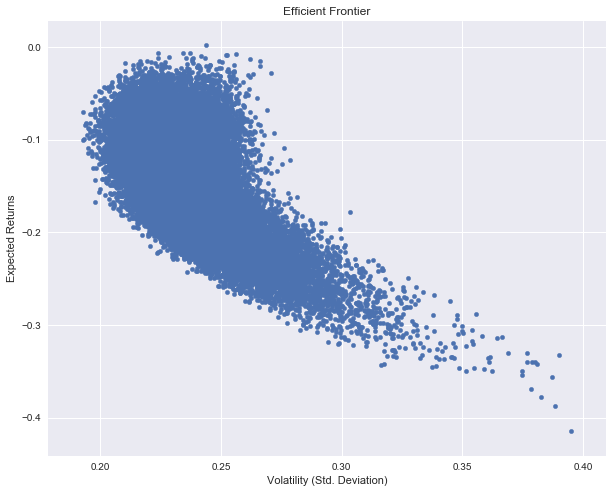

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import cvxopt as opt
from cvxopt import blas, solvers
import fix_yahoo_finance as yf



solvers.options['show_progress'] = False
yf.pdr_override()
try:
    df1 = pdr.get_data_yahoo("GOOG", start = "2018-01-01", end = "2019-01-01")
    df2 = pdr.get_data_yahoo("BTC-USD", start = "2018-01-01", end = "2019-01-01")
    df3 = pdr.get_data_yahoo("AAPL", start = "2018-01-01", end = "2019-01-01")
    df4 = pdr.get_data_yahoo("INTC", start = "2018-01-01", end = "2019-01-01")
    df5 = pdr.get_data_yahoo("CAT", start = "2018-01-01", end = "2019-01-01")
    df6 = pdr.get_data_yahoo("JNJ", start = "2018-01-01", end = "2019-01-01")
    df7 = pdr.get_data_yahoo("FB", start = "2018-01-01", end = "2019-01-01")
    
except ValueError:
    "Error"


return_GOOG = df1.Close.pct_change()[1:]
return_AAPL = df3.Close.pct_change()[1:]
return_INTC = df4.Close.pct_change()[1:]
return_CAT = df5.Close.pct_change()[1:]
return_JNJ = df6.Close.pct_change()[1:]
return_FB = df7.Close.pct_change()[1:]
return_BTC = df2.Close.pct_change()[1:]

selected = ['GOOG', 'AAPL', 'INTC', 'CAT', 'JNJ', 'FB', 'BTC']
returns_daily = pd.concat([return_GOOG, return_AAPL, return_INTC, return_CAT, return_JNJ, return_FB, return_BTC], axis=1).reset_index()
returns_annual = returns_daily.mean() * 250
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

port_returns = []
port_volatility = []
stock_weights = []
num_assets = 7
num_portfolios = 50000


for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

portfolio = {'Returns': port_returns,
             'Volatility': port_volatility}

for counter,symbol in enumerate(selected):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]


df = pd.DataFrame(portfolio)
column_order = ['Returns', 'Volatility'] + [stock+' Weight' for stock in selected]
df = df[column_order]
min_volatility_data = df.iloc[df['Volatility'].idxmin()]
print(min_volatility)

plt.style.use('seaborn')
df.plot.scatter(x='Volatility', y='Returns', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()



